# Physik LK Arbeit Aufgabe 1, Aussage III: Sind die Uhren synchron?


Einbinden verschiednener Bibiliotheken

In [1]:
from pltgraph import plt_data
%config InlineBackend.figure_format = 'svg'
from math import pi, sqrt   

### Festlegen der Variablen
`c_mov`:                        Angezeigte Zeit der bewegten Uhr\
`c_static`:                     Angezeigte Zeit der ruhenden Uhr\
`g`:                            Erdbeschleunigung 9.81\
`a`:                            Beschleunigung des Aufzuges\
`c_mov_last`, `c_static_last`:  jeweils letzer Wert der Simulation\
`def frequency(a)`:             Funktion die die Frequenz in hz für ein Sekundenpendel in Abhängigkeit von der Beschleunigung angibt



In [2]:
c_mov = [0]     # Angezeigte Zeit der bewegten Uhr (erster Wert 0s)
c_static = [0]  # Angezeigte Zeit der ruhenden Uhr (erster Wert 0s)
time = [0]      # Echte Zeit

def frequency(a, l=0.994): 
    return 1/(2*pi*sqrt(l/a))  # Funktion die die Frequenz in hz für ein Sekundenpendel in Abhängigkeit von der Beschleunigung angibt

a = 1.2  # Beschleunigung des Aufzugs
g = 9.81 # Erdbeschleunigung

n1 = 0
n2 = 0

c_mov_last = 0
c_static_last = 0 #jeweils letzer Wert der Simulation

### Berechenen der Frequenzen

In [3]:
print(round(frequency(g+a),4), round(frequency(g),4), round(frequency(g-a),4)) #Gesamtbeschleunigung g+a bzw. g-a
print(round(frequency(g)-frequency(g+a),4),round(frequency(g)-frequency(g-a),4))

0.5297 0.5 0.4684
-0.0297 0.0316


Die Frequenz der Ruhenden, beziehungsweise der bewegten Uhr während sie keine Beschleunigung erfährt, ist **0.5Hz**\
Dieses Ergebnis ist auch zu erwarten, da sie pro Schwingung den Impuls für den Sekundenzeiger 2 mal auslöst.

Beschleunigt die Uhr aber nach oben (Anfahren auf der Hochfahrt) beträgt sie **0.5297Hz**, beschleunigt sie nach unten (Abbremsen auf der Hochfahrt) beträgt sie **0.4684Hz**

Das macht beim Beschleunigen nach oben eine Abweichung von (-) **0.0297Hz**, aber beim Beschleunigen nach unten ganze **0.0316Hz**

**Es lässt sich also feststellen, dass die Abweichung der Frequenz der Uhren beim Beschleunigen nach oben kleiner ist, als beim Beschleunigen nach unten**

### Simulation der Hochfahrt

In [4]:
for t in range(1,33): # 32 Sekunden Dauer
    time.append(t)      

    c_static_new = c_static_last + frequency(g)*2   # Ruhende Uhr wird immer mit der Erdbeschleunigung berechnet
    c_static.append(c_static_new)                   
    c_static_last = c_static_new

    if t in range(1,7):                             # Erste 6 Sekunden
        c_mov_new = c_mov_last + frequency(g+a)*2   # Bewegte Uhr mit Erdbeschleunigung + Beschleunigung des Aufzugs berechnet

    elif t in range(27,33):                         # Letze 6 Sekunden
        c_mov_new = c_mov_last + frequency(g-a)*2   # Bewegte Uhr mit Erdbeschleunigung - Beschleunigung des Aufzugs berechnet

    else:                                           # Rest der Fahrt
        c_mov_new = c_mov_last + frequency(g)*2     # Bewegte Uhr wird mit der Erdbeschleunigung berechnet

    c_mov.append(c_mov_new)
    c_mov_last = c_mov_new 


Die Hochfahrt dauert 32 Sekunden, die ersten 6s beschleunigt der Aufzug mit $1.2 \frac{m}{s}$, die letzen 6s bremst er mit gleicher Beschleunigung ab.

Die Simulation berechnet für jede Sekunde wie oft die Uhren einen Impuls vom Pendel erhalten haben. Dabei werden auch Dezimalzahlen akzeptiert, da sie sich im Laufe der Simulation aufaddieren.\
Um das zu berechnen wird bei jeden durchlauf der letzte Wert für die Anzahl der Impulse mit der aktuellen Frequenz mal 2 addiert. Mal 2 weil sie pro Schwingung den Impuls 2 mal auslöst.

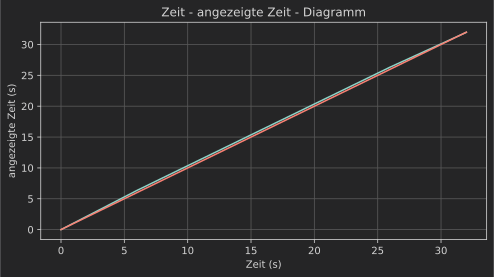

In [5]:
description = {
    "title": "Zeit - angezeigte Zeit - Diagramm",
    "xLable": "Zeit (s)",
    "yLable": "angezeigte Zeit (s)"
}
plt_data(time, (c_mov, c_static), description)

Wenn man die Werte beider Uhren graphisch darstellt, kann man sehen, dass die ruhende Uhr (Rot) linear verläuft und nicht von der echten Zeit abweicht.

Die Bewegte Uhr (Blau) hingegen entfernt sich in den ersten 6 Sekunden von der roten Linie, danach verläuft sie Parallel über der roten Linie (Uhr zeigt zu viel an) und in den letzen 6 Sekunden nähert sie sich ihr wieder

In [6]:
print(round(c_static[-1],4), round(c_mov[-1],4), round(c_mov[-1]-c_static[-1],4))

31.9994 31.9768 -0.0226


Nach der Fahrt zeigt die ruhende Uhr **31.9994s** also fast genau die wirklich vergangenen **32s**

Die bewegte Uhr Zeigt **31.9768s** an also eine Abweichung von **-0.0226s. Sie geht also nach.**

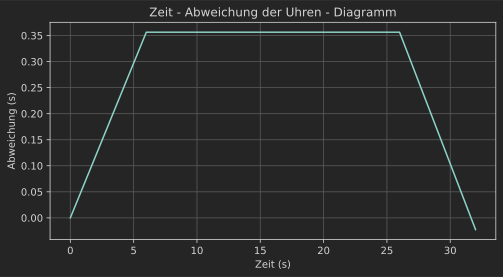

0.3564


In [7]:
d_c = []
for m, s in zip(c_mov, c_static):   #Berechnen der Differenz zwischen den Daten der Uhr
    d_c.append(m-s)

description = {
    "title": "Zeit - Abweichung der Uhren - Diagramm",
    "xLable": "Zeit (s)",
    "yLable": "Abweichung (s)"
}
plt_data(time, d_c, description)

print(round(max(d_c),4))

Die größte Abweichung ist **0.3564s** also fast **16 mal so groß wie die Abweichung nach der Fahrt**.\
Während der Fahrt geht **die Uhr also vor**

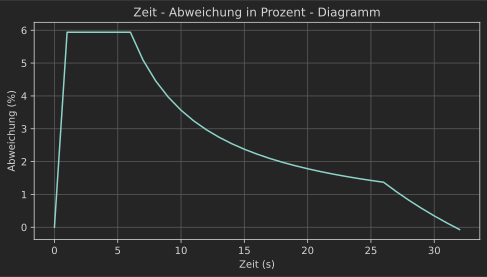

5.9398 -0.0705


In [8]:
d_c_percent = []

for s,d in zip(c_static, d_c):
    if s == 0: 
        d_c_percent.append(0) 
        continue
    d_c_percent.append((d/s) * 100)

description = {
    "title": "Zeit - Abweichung in Prozent - Diagramm",
    "xLable": "Zeit (s)",
    "yLable": "Abweichung (%)"
}

plt_data(time, d_c_percent, description)

print(round(max(d_c_percent),4), round(d_c_percent[-1],4))

Dieser Graph zeigt die Abweichung der Gesamtzeit in Proznet. Sie ist mit **5.9398%** während dem Anfahren am größten.\
Nach der Fahrt beträgt sie **nur noch -0.0705%**

### 32s Aufenthalt

In [9]:
for t in range(33,65): #die nächsten 32 Sekunden der Simulation
    time.append(t)
    c_static_new = c_static_last + frequency(g)*2
    c_static.append(c_static_new)
    c_static_last = c_static_new

    c_mov_new = c_mov_last +frequency(g)*2
    c_mov.append(c_mov_new)
    c_mov_last = c_mov_new



Nun wird ein **32s langer Aufenthalt** oben Simuliert. Dieser hat hauptsächlich Einfluss auf die relative Abeweichung der Gesamtzeit. Die Abweichung der Uhren nach den ankommen oben von **-0.0226s bleibt gleich**

### Abfahrt

In [10]:
for t in range(65,97): #Die letzen 32 Sekunden der Simulation
    time.append(t)

    c_static_new = c_static_last + frequency(g)*2
    c_static.append(c_static_new)
    c_static_last = c_static_new

    if t in range(65,71):
        c_mov_new = c_mov_last +frequency(g-a)*2    # Bewegte Uhr mit Erdbeschleunigung - Beschleunigung des Aufzugs berechnet

    elif t in range(91,97):
        c_mov_new = c_mov_last +frequency(g+a)*2    # Bewegte Uhr mit Erdbeschleunigung + Beschleunigung des Aufzugs berechnet

    else: 
        c_mov_new = c_mov_last +frequency(g)*2

    c_mov.append(c_mov_new)
    c_mov_last = c_mov_new 

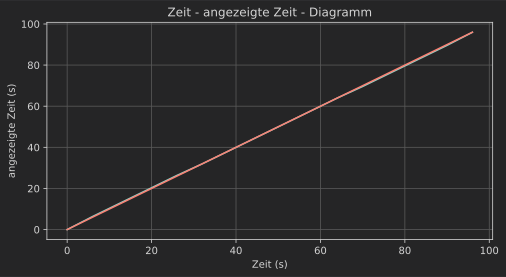

95.9981 95.953 0.0451


In [11]:
description = {
    "title": "Zeit - angezeigte Zeit - Diagramm",
    "xLable": "Zeit (s)",
    "yLable": "angezeigte Zeit (s)"
}
plt_data(time, (c_mov, c_static), description)
print(round(c_static[-1],4), round(c_mov[-1],4), round(c_static[-1]-c_mov[-1],4))


Während der 32s Pause verlaufen beide Graphen **nahezu ineinander.** 

Wenn der Aufzug bei 64s beginnt nach unten zu beschleunigen wandert der Graph der bewegten Uhr unter den der ruhenden Uhr.\
In den letzen 6s bremst der Aufzug ab, beschleunigt also nach oben. Die Graphen nähern sich wieder.

Nach beiden Fahrten (**96s**) zeigt die Ruhende Uhr **95.9981s** und die Bewegte **95.9530s** an.

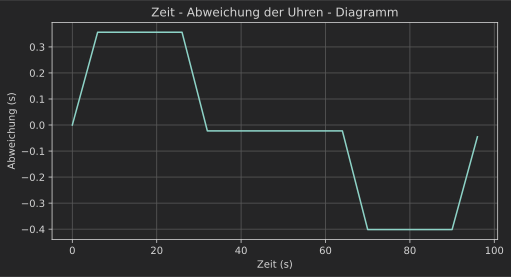

-0.4015 -0.0451


In [12]:
d_c = []
for m, s in zip(c_mov, c_static):
    d_c.append(m-s)

description = {
    "title": "Zeit - Abweichung der Uhren - Diagramm",
    "xLable": "Zeit (s)",
    "yLable": "Abweichung (s)"
}
plt_data(time, d_c, description)

print(round(min(d_c),4),round(d_c[-1],4))

Während der Pause ist die Abweichung **konstant.**

Während der Abfahrt ist die größte Abweichung **-0.4015s**, also absolut **0,0451s größer als bei der Hochfahrt. Die Uhr geht nach**

Nach der Abfahrt ist die Abweichung **-0.0451s, also doppelt so groß wie nach der Hochfahrt. Die Uhr geht immernoch nach**

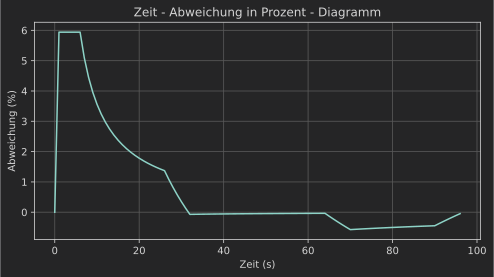

-0.5736 -0.047


In [13]:
d_c_percent = []

for s,d in zip(c_static, d_c):
    if s == 0: 
        d_c_percent.append(0) 
        continue
    d_c_percent.append(d/s *100)

description = {
    "title": "Zeit - Abweichung in Prozent - Diagramm",
    "xLable": "Zeit (s)",
    "yLable": "Abweichung (%)"
}

plt_data(time, d_c_percent, description)

print(round(min(d_c_percent),4), round(d_c_percent[-1],4))

**HINWEIS: Folgende Daten sind stark von der Dauer der von mir ausgedachten Pause abhängig und habe keine universelle Aussagekraft!**

Während der Pause wird (der Betrag der) prozentualen Abweichung **kleiner. **

Beim Anfahren auf der Abfahrt steigt er auf **-0.5736% an, also mehr als 10 mal kleiner als auf der Hinfahrt.**

Nach beiden Fahrten beträgt die realtive Abweichung der Gesamtzeit **nur -0.047%**

### Fazit
Während sich die Uhr bewegt ist die Abweichung am größten. Allerdings wird sie fast (**0.0226s bzw.-22.6ms Abweichung pro Fahrt**) **nach der Fahrt wieder Aufgehoben**. Nur sehr langfristig lässt sich erkennen, dass die Uhr im Aufzug nach geht.

**Vereinfacht lässt sich dennoch sagen, das beide Uhren wenn sie sich nicht bewegen synchron sind, da die Abweichung während der Bewegung viel viel größer ist**